In [1]:
# Initial imports.
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Loading data
file_path = Path("../Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [3]:
# Define the features set.
X = df_loans.copy()
X = X.drop("bad", axis=1)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [4]:
# Define the target set.
y = df_loans["bad"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [5]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fit the Random Forest Model

In [7]:
# Create a random forest classifier. The n_estimators will allow us to set the number of random forests that will be 
# created by the algorithm. Generally, the higher number makes the predictions stronger and more stable, but can slow 
# down the output because of the higher training time allocated. The best practice is to use between 64 and 128 random 
# forests, though higher numbers are quite common despite the higher training time. For our purposes, we’ll create 128 random forests.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78) 

In [8]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Make Predictions Using the Testing Data

In [9]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## Evaluate the Model

In [10]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

In [11]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [12]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,26,15


Accuracy Score : 0.52
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.60      0.62        84
           1       0.31      0.37      0.33        41

    accuracy                           0.52       125
   macro avg       0.48      0.48      0.48       125
weighted avg       0.54      0.52      0.53       125



## Rank the Importance of Features

One nice byproduct of the random forest algorithm is to rank the features by their importance, which allows us to see which features have the most impact on the decision.

To calculate the feature importance, we can use the feature_importances_ attribute with the following code:

In [13]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.05479564, 0.083734  , 0.42871538, 0.32290918, 0.01986699,
       0.02382607, 0.0025937 , 0.0238055 , 0.01947929, 0.02027425])

In [14]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.42871537959784756, 'age'),
 (0.322909180511852, 'month_num'),
 (0.08373400008559587, 'term'),
 (0.054795639837519644, 'amount'),
 (0.023826066130178958, 'education_High School or Below'),
 (0.023805501611235368, 'education_college'),
 (0.020274246776222464, 'gender_male'),
 (0.01986699331709372, 'education_Bachelor'),
 (0.019479294982300867, 'gender_female'),
 (0.0025936971501533874, 'education_Master or Above')]

## Bootstrap Aggregation

Bootstrap aggregation, also called bagging, is a machine learning technique used to combine weak learners into a strong learner. Bagging is composed of two parts: bootstrapping and aggregation.

#### Bootstrapping
Bootstrapping is a sampling technique in which samples are randomly selected, then returned to the general pool and replaced, or put back into the general pool. Bootstrapping is simply a sampling technique with which a number of samples are made, and in which an observation can occur multiple times.

#### Aggregation
In the aggregation step, different classifiers are run, using the samples drawn in the bootstrapping stage. Each classifier is run independently of the others, and all the results are aggregated via a voting process. Each classifier will vote for a label (a prediction). The final prediction is the one with the most votes.

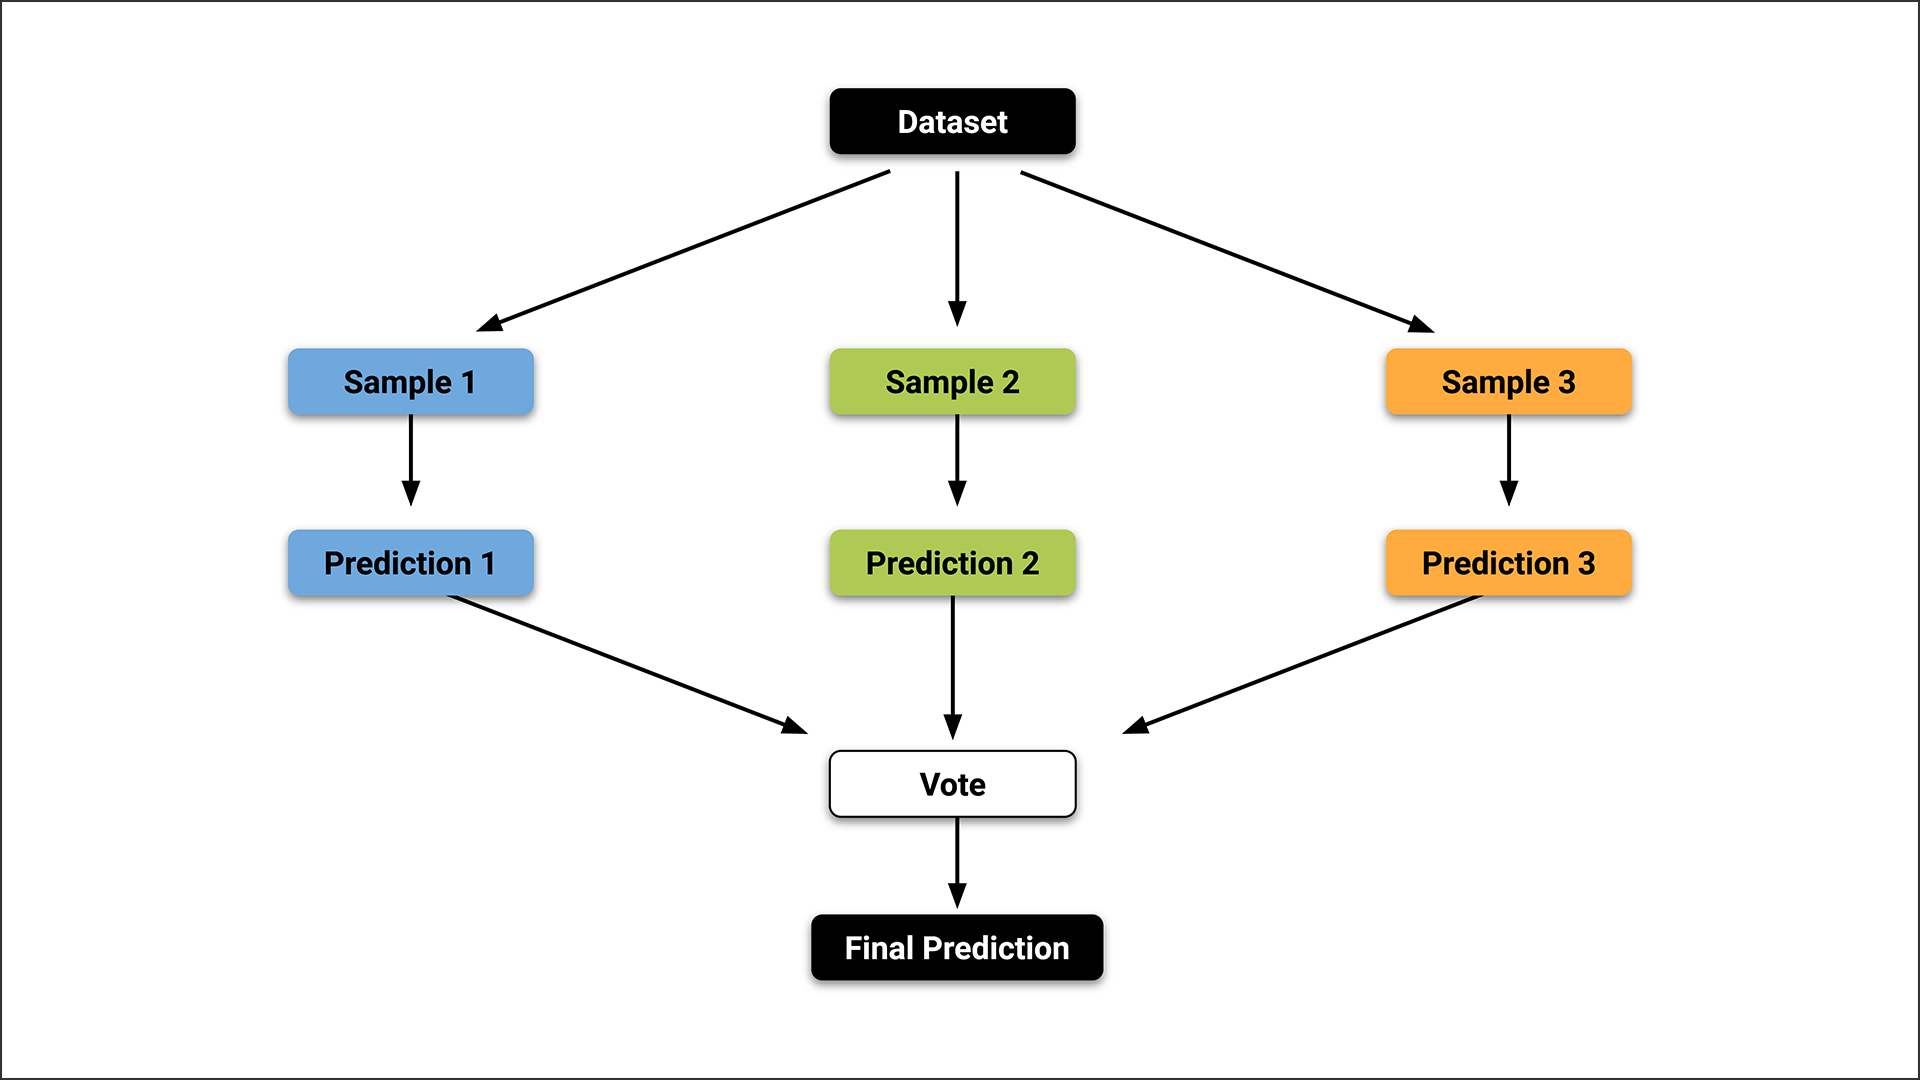

# Boosting 
Boosting is another technique to combine weak learners into a strong learner. However, there is a major difference between bagging and boosting. In bagging, as you have seen, multiple weak learners are combined at the same time to arrive at a combined result.
In boosting, however, the weak learners are not combined at the same time. Instead, they are used sequentially, as one model learns from the mistakes of the previous model.

Like bagging, boosting is also a technique to combine a set of weak learners into a strong learner. We saw in bagging that the different models work independently of one another. In contrast, boosting trains a sequence of weak models. As shown below, each model learns from the errors of the previous model, and the models form an ensemble:

Boosting is an ensemble technique in which a model corrects the errors of its predecessor.

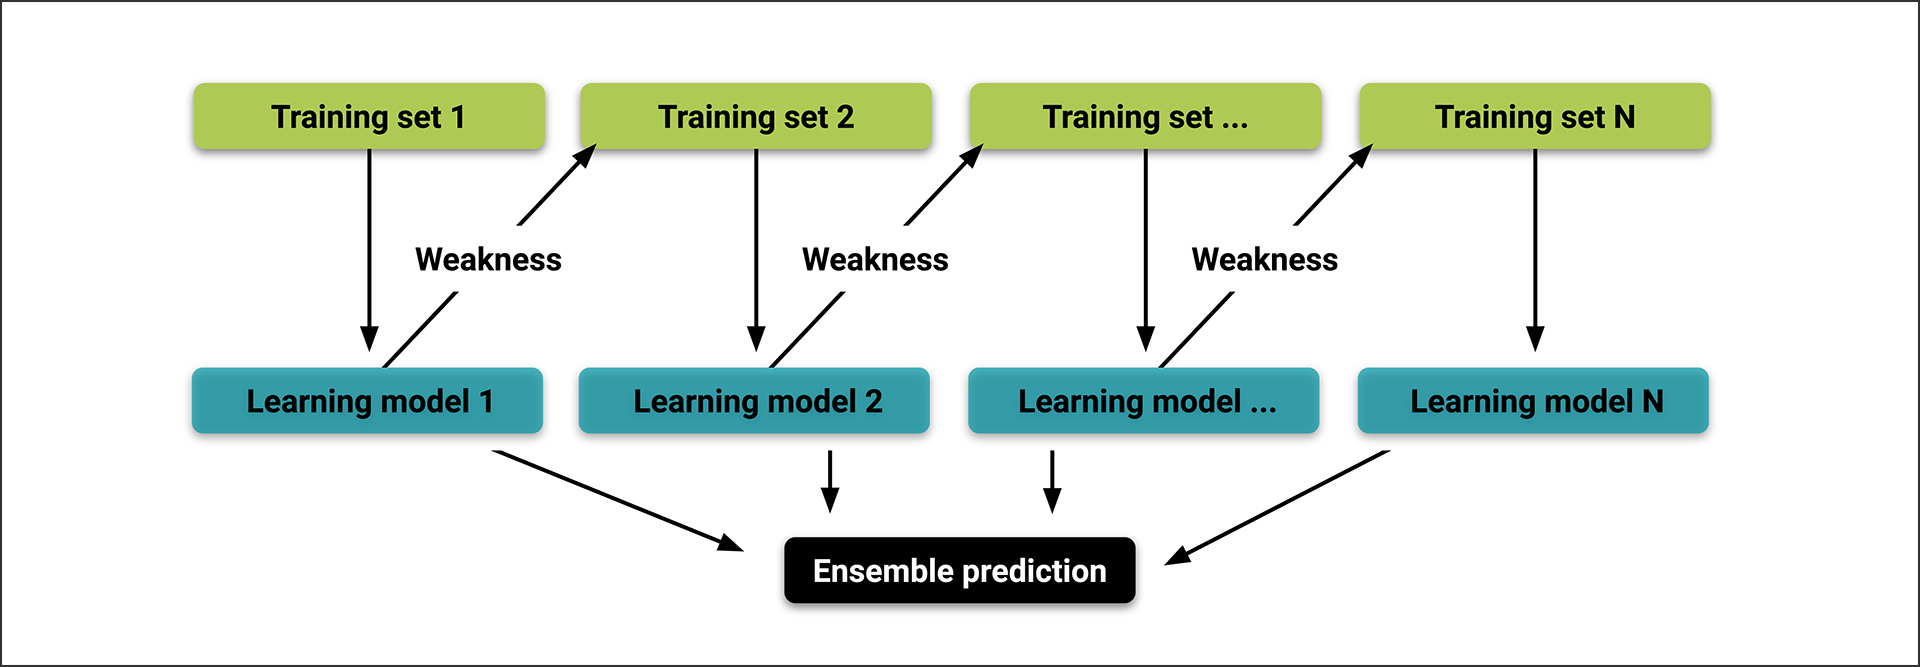

# Adaptive Boosting

The idea behind Adaptive Boosting, called AdaBoost, is easy to understand. In AdaBoost, a model is trained then evaluated. After evaluating the errors of the first model, another model is trained. This time, however, the model gives extra weight to the errors from the previous model. The purpose of this weighting is to minimize similar errors in subsequent models. Then, the errors from the second model are given extra weight for the third model. This process is repeated until the error rate is minimized. 
The final classifier might appear like the following:

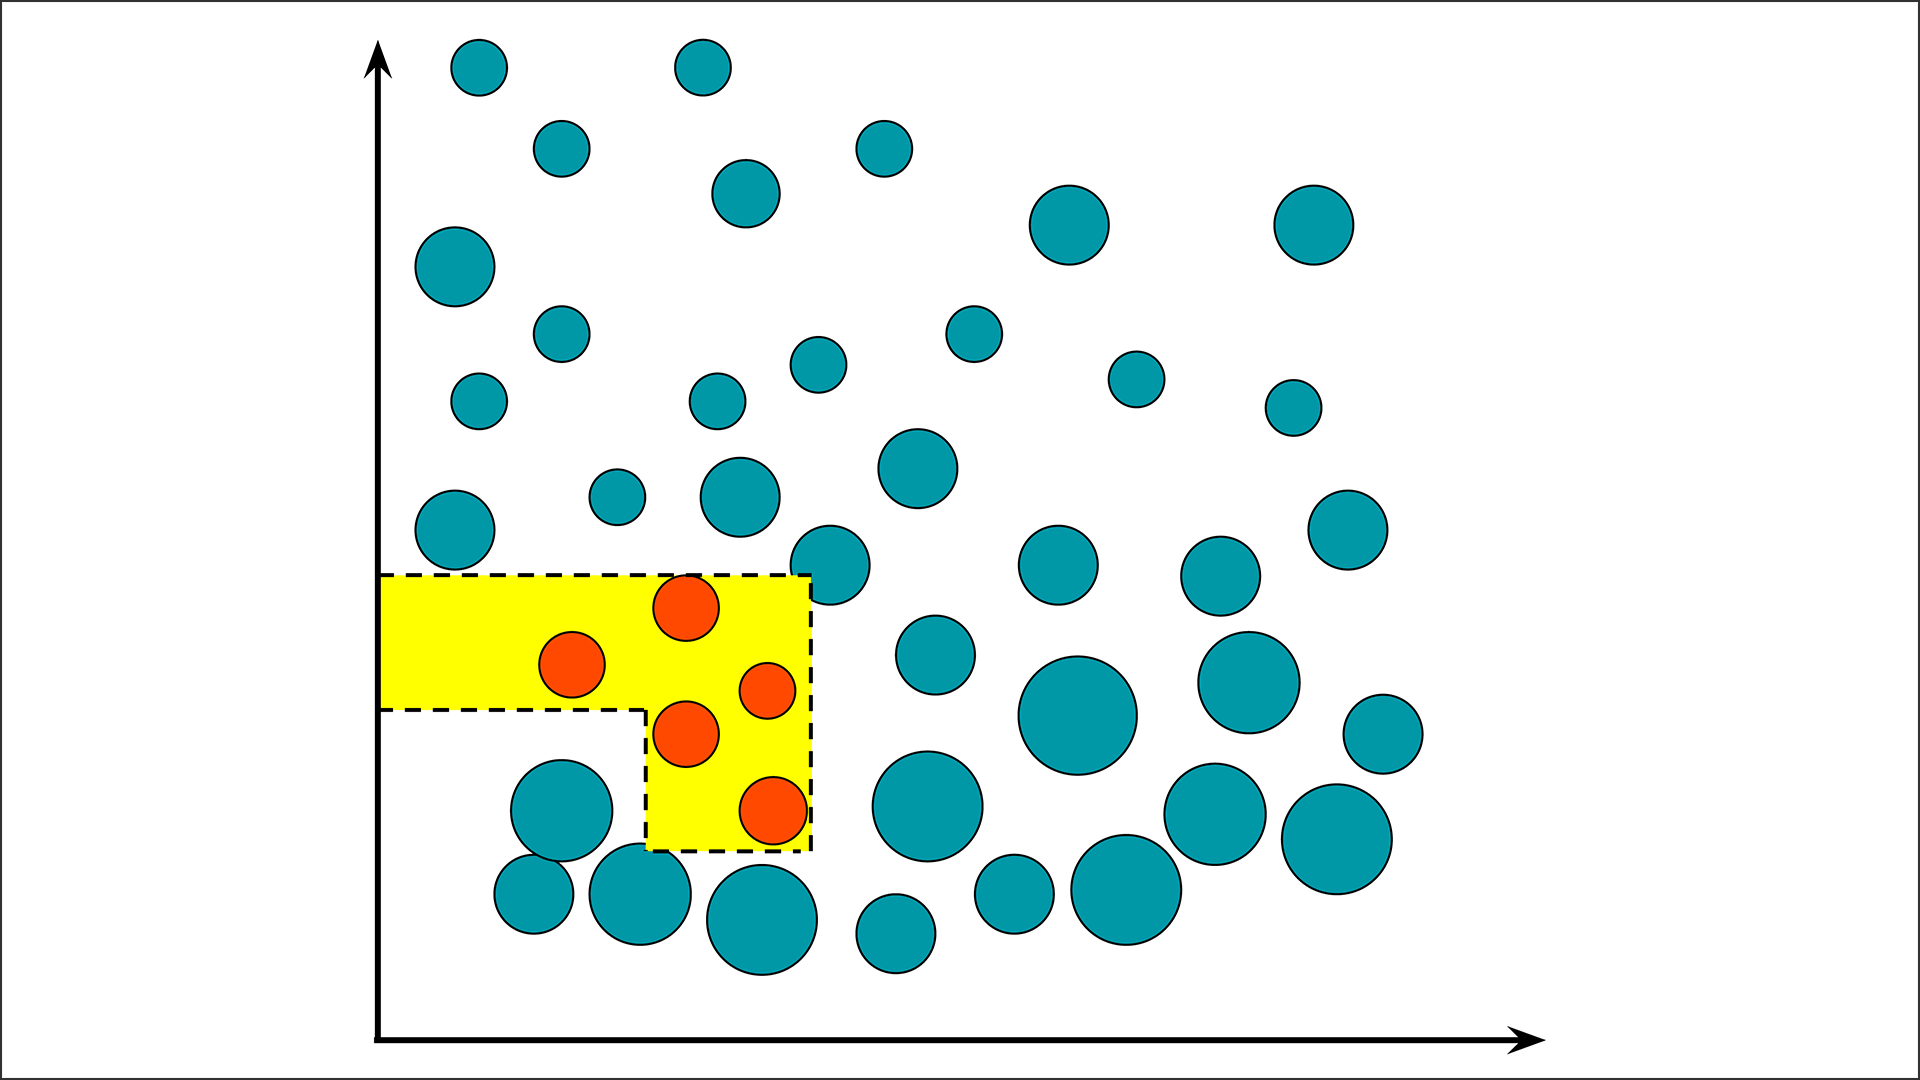

# Gradient Boosting

Gradient boosting, like AdaBoost, is an ensemble method that works sequentially. In contrast to AdaBoost, gradient boosting does not seek to minimize errors by adjusting the weight of the errors. Instead, it follows this process:.

1. A small tree (called a stump) is added to the model, and the errors are evaluated.
2. A second stump is added to the first and attempts to minimize the errors from the first stump. These errors are called pseudo-residuals.
3. A third stump is added to the first two and attempts to minimize the pseudo-residuals from the previous two.
4. The process is repeated until the errors are minimized as much as possible, or until a specified number of repetitions has been reached:

In gradient boosting, the learning rate refers to how aggressively pseudo-residuals are corrected during each iteration. In general, it is preferable to begin with a lower learning rate and, if necessary, adjust the rate upward.

Gradient boosting is a powerful technique that is often used in machine learning competitions.

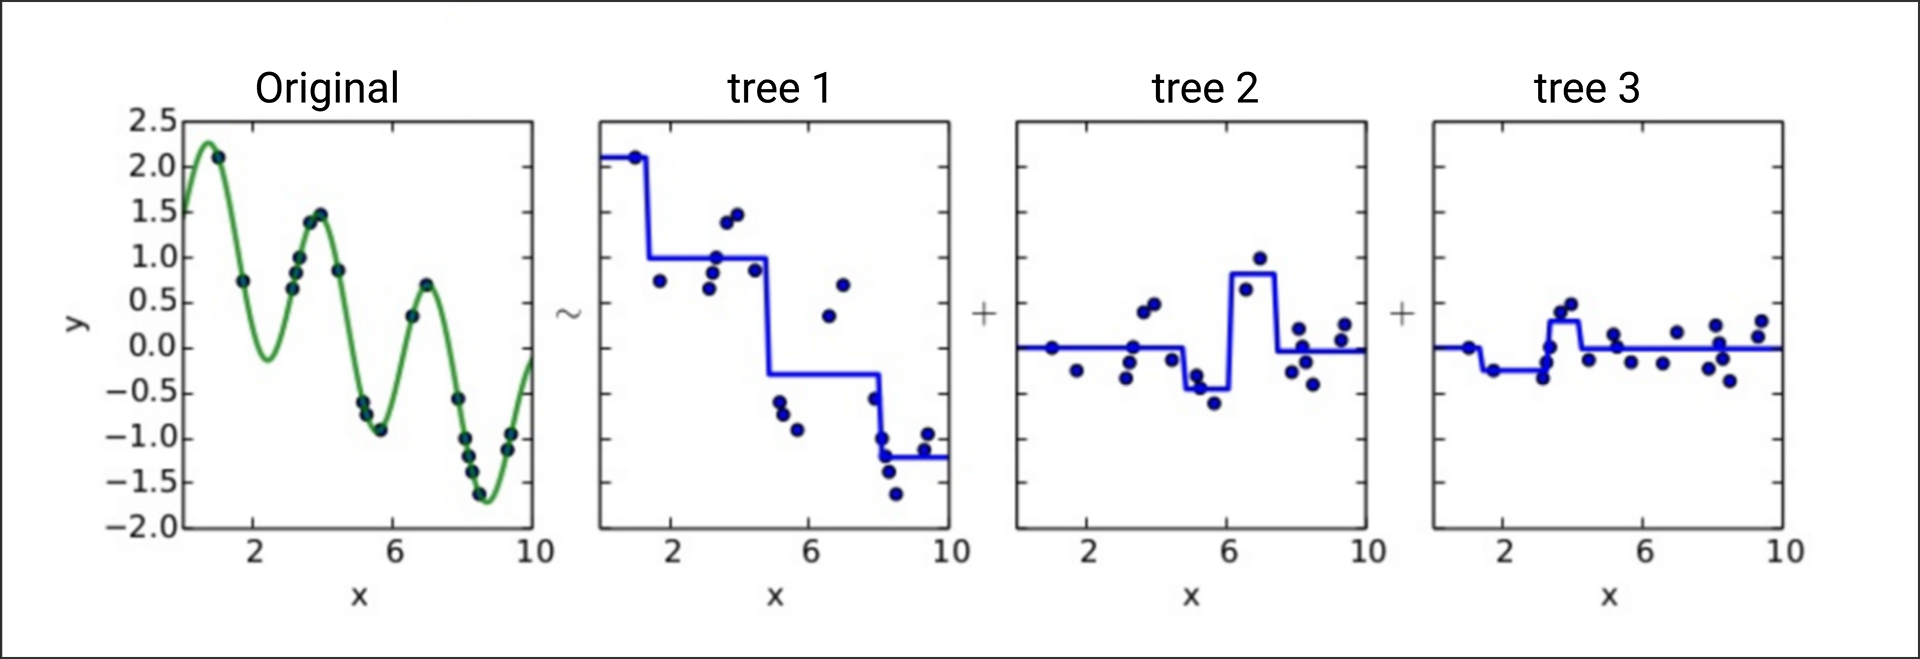